In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
mpl.style.use('ggplot')
import re

In [3]:
train=pd.read_csv('data/titanic/train.csv')
test=pd.read_csv('data/titanic/test.csv')
passengerId=test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.Name.apply(len)

0      23
1      51
2      22
3      44
4      24
5      16
6      23
7      30
8      49
9      35
10     31
11     24
12     30
13     27
14     36
15     32
16     20
17     28
18     55
19     23
20     20
21     21
22     27
23     28
24     29
25     57
26     23
27     30
28     29
29     19
       ..
861    27
862    51
863    33
864    22
865    24
866    28
867    36
868    27
869    31
870    17
871    48
872    24
873    27
874    37
875    32
876    29
877    20
878    18
879    45
880    44
881    18
882    28
883    29
884    22
885    36
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [7]:
full_data = [train, test]
# Some features of my own that I have added in
# Gives the length of the name
for dataset in full_data:
    dataset['Name_length'] = dataset.Name.apply(len)
    dataset['Has_Cabin'] = dataset.Cabin.apply(lambda x: 0 if type(x) == float else 1)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.IsAlone[dataset['FamilySize'] == 1] = 1
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

In [8]:
train.Age.isnull().sum()

177

In [16]:
np.random.randint(3.5,8.9,4)

array([5, 7, 3, 4])

In [18]:
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset.Age.mean()
    age_std = dataset.Age.std()
    age_null_count = dataset.Age.isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset.Age)] = age_null_random_list
    dataset['Age'] = dataset.Age.astype(int)

In [26]:
pd.cut(train.Age, 5)[0]

Interval(16.0, 32.0, closed='right')

In [20]:
pd.cut(train.Age,5).value_counts()

(16.0, 32.0]     437
(32.0, 48.0]     262
(-0.08, 16.0]    112
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

In [30]:
pd.qcut(train.Age, 5)[0]

Interval(19.0, 25.0, closed='right')

In [31]:
pd.qcut(train.Age,5).value_counts()

(-0.001, 19.0]    196
(25.0, 32.0]      186
(32.0, 40.0]      174
(40.0, 80.0]      168
(19.0, 25.0]      167
Name: Age, dtype: int64

In [32]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
train['CategoricalAge'] = pd.cut(train['Age'], 5)

In [33]:

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [41]:

# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [42]:

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.Fare[ dataset['Fare'] <= 7.91] = 0
    dataset.Fare[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454)] = 1
    dataset.Fare[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31)]  = 2
    dataset.Fare[ dataset['Fare'] > 31] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.Age[ dataset['Age'] <= 16] = 0
    dataset.Age[(dataset['Age'] > 16) & (dataset['Age'] <= 32)] = 1
    dataset.Age[(dataset['Age'] > 32) & (dataset['Age'] <= 48)] = 2
    dataset.Age[(dataset['Age'] > 48) & (dataset['Age'] <= 64)] = 3
    dataset.Age[ dataset['Age'] > 64] = 4 ;

In [51]:
# drop iloc=2
train.drop([2])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,23,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,51,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,44,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,24,0,1,1,"(7.91, 14.454]","(32.0, 48.0]",1
5,6,0,3,"Moran, Mr. James",1,2,0,0,330877,1,NaN,2,16,0,1,1,"(7.91, 14.454]","(32.0, 48.0]",1
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,17463,3,E46,0,23,1,1,1,"(31.0, 512.329]","(48.0, 64.0]",1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,349909,2,NaN,0,30,0,5,0,"(14.454, 31.0]","(-0.08, 16.0]",4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,347742,1,NaN,0,49,0,3,0,"(7.91, 14.454]","(16.0, 32.0]",3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,237736,2,NaN,1,35,0,2,0,"(14.454, 31.0]","(-0.08, 16.0]",3
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,0,1,1,PP 9549,2,G6,0,31,1,3,0,"(14.454, 31.0]","(-0.08, 16.0]",2


In [52]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)


In [12]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1


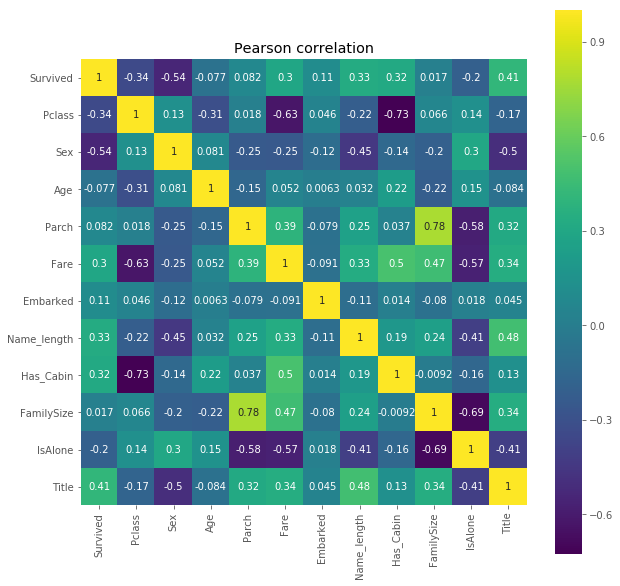

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),square=True, annot=True, linecolor='white',cmap=plt.cm.viridis ).set_title('Pearson correlation')

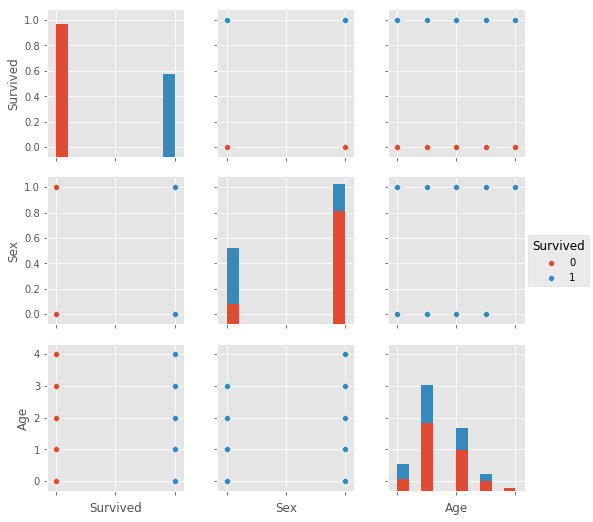

In [55]:
g=sns.pairplot(train[['Survived','Sex','Age']], hue='Survived')
g.set(xticklabels=[])


In [60]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [61]:
kd=KFold(n_splits=3)
list(kd.split(np.arange(10)))

[(array([4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3])),
 (array([0, 1, 2, 3, 7, 8, 9]), array([4, 5, 6])),
 (array([0, 1, 2, 3, 4, 5, 6]), array([7, 8, 9]))]

In [64]:
list(kd.split(np.arange(9)))

[(array([3, 4, 5, 6, 7, 8]), array([0, 1, 2])),
 (array([0, 1, 2, 6, 7, 8]), array([3, 4, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7, 8]))]

In [65]:
list(kd.split(np.arange(11)))

[(array([ 4,  5,  6,  7,  8,  9, 10]), array([0, 1, 2, 3])),
 (array([ 0,  1,  2,  3,  8,  9, 10]), array([4, 5, 6, 7])),
 (array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 8,  9, 10]))]

In [66]:
x=np.arange(20)
y=np.random.randint(1,4,20)
y

array([3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2, 2, 1, 2, 3, 1])

In [67]:
sk=StratifiedKFold(n_splits=3)
list(sk.split(x,y))

[(array([ 6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19]),
  array([ 0,  1,  2,  3,  4,  5, 11, 12])),
 (array([ 0,  1,  2,  3,  4,  5, 11, 12, 13, 14, 15, 17, 18, 19]),
  array([ 6,  7,  8,  9, 10, 16])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 16]),
  array([13, 14, 15, 17, 18, 19]))]

In [68]:
sk=StratifiedKFold(n_splits=4)
list(sk.split(x,y))

[(array([ 5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([ 0,  1,  2,  3,  4, 11])),
 (array([ 0,  1,  2,  3,  4,  8, 11, 13, 14, 15, 16, 17, 18, 19]),
  array([ 5,  6,  7,  9, 10, 12])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 15, 17, 18, 19]),
  array([ 8, 13, 14, 16])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16]),
  array([15, 17, 18, 19]))]

In [69]:
sss=StratifiedShuffleSplit(n_splits=4, test_size=0.3)
list(sss.split(x,y))

[(array([ 4,  9, 12,  1,  2, 11, 18, 19, 17,  0,  8,  3,  7,  5], dtype=int64),
  array([13, 15, 14,  6, 16, 10], dtype=int64)),
 (array([19,  2,  0,  7, 12, 14, 11,  8,  5, 10,  1, 13,  6,  3], dtype=int64),
  array([16, 18,  9, 17, 15,  4], dtype=int64)),
 (array([ 8, 15, 11,  5, 18, 14, 13,  6, 16, 19,  9,  7,  3,  0], dtype=int64),
  array([ 2, 10, 17, 12,  4,  1], dtype=int64)),
 (array([14, 16, 18, 19,  3,  5, 13,  2, 17,  4, 10,  0, 11,  7], dtype=int64),
  array([ 6,  8,  9,  1, 15, 12], dtype=int64))]

In [70]:
class sklearnhelper1(object):
    def __init__(self, clf, params):
        params['random_state']=0
        self.clf=clf(**params)
    def fit(self, x, y):
        self.clf.fit(x,y)
    def predict(self,x):
        return self.clf.predict(x)
    def feature_importance(self):
        return self.clf.feature_importances_

In [71]:
class sklearnhelper:
    def __init__(self, clf, params):
        params['random_state']=0
        self.clf=clf(**params)
    def fit(self, x, y):
        self.clf.fit(x,y)
    def predict(self, x):
        return self.clf.predict(x)
    def feature_importance(self):
        return self.clf.feature_importances_

In [72]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [73]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [74]:
rf=sklearnhelper(RandomForestClassifier, params=rf_params)
ex=sklearnhelper(ExtraTreesClassifier,params=et_params)
ada=sklearnhelper(AdaBoostClassifier, params=ada_params)
gb=sklearnhelper(GradientBoostingClassifier, params=gb_params)
svc=sklearnhelper(SVC, params=svc_params)

In [75]:
y_train=train.Survived.values
x_train=train.drop(['Survived'],axis=1).values
x_test=test.values

In [45]:
np.zeros((10,1))

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [78]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [76]:
ntrain=train.shape[0]
ntest=test.shape[0]
kf=KFold(n_splits=5, random_state=0)

In [79]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train=np.zeros(ntrain)
    oof_test_skf=np.zeros((5, ntest)) # 5 is the number of folds
    oof_test=np.zeros(ntest)
    
    for i, (train_index, test_index) in enumerate(kf.split(np.arange(ntrain))):
        x_tr, y_tr=x_train[train_index], y_train[train_index]
        x_te=x_train[test_index]
        clf.fit(x_tr, y_tr)
        oof_train[test_index]=clf.predict(x_te)
        oof_test_skf[i,:]=clf.predict(x_test)
    
    oof_test=np.mean(oof_test_skf,axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [80]:
ex_oof_train, et_oof_test = get_oof(ex, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

In [81]:
rf.fit(x_train, y_train)
rf_feature = rf.feature_importance()

ex.fit(x_train, y_train)
ex_feature = ex.feature_importance()

ada.fit(x_train, y_train)
ada_feature = ada.feature_importance()

gb.fit(x_train, y_train)
gb_feature = gb.feature_importance()

In [82]:
rf_feature

array([ 0.12383343,  0.2018798 ,  0.03572908,  0.02090468,  0.07119736,
        0.02351832,  0.10781632,  0.06420651,  0.06713413,  0.01335632,
        0.27042405])

In [86]:
importances=pd.DataFrame({'features':train.columns[1:],
                          'ExtraTree':ex_feature,
                          'RandomForest':rf_feature,
                          'Adaboost':ada_feature,
                          'GradientBoosting':gb_feature
                         })
importances

,Adaboost,ExtraTree,GradientBoosting,RandomForest,features
0,0.028,0.121631,0.062517,0.123833,Pclass
1,0.012,0.382942,0.032938,0.201880,Sex
2,0.016,0.032283,0.091313,0.035729,Age
3,0.064,0.016596,0.034697,0.020905,Parch
4,0.038,0.055546,0.099814,0.071197,Fare
5,0.010,0.027776,0.059832,0.023518,Embarked
6,0.696,0.045195,0.425528,0.107816,Name_length
7,0.012,0.083320,0.023963,0.064207,Has_Cabin
8,0.052,0.044180,0.065642,0.067134,FamilySize
9,0.004,0.020908,0.018496,0.013356,IsAlone


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

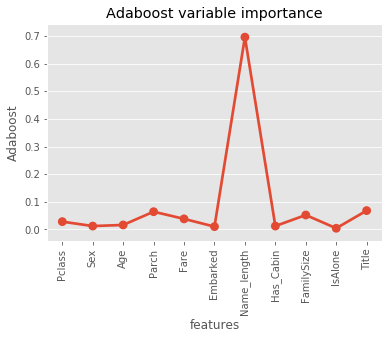

In [88]:
sns.pointplot('features','Adaboost', data=importances).set_title("Adaboost variable importance")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

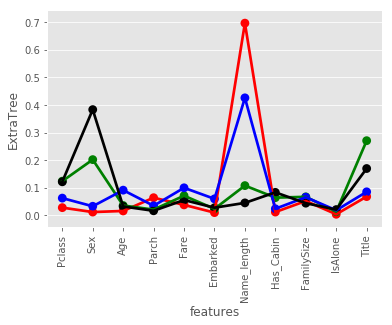

In [87]:
sns.pointplot('features','Adaboost',data=importances, color='r')
sns.pointplot('features','RandomForest',data=importances,color='g')
sns.pointplot('features','GradientBoosting',data=importances,color='b')
sns.pointplot('features','ExtraTree',data=importances,color='k')
plt.xticks(rotation=90)

In [89]:
mean_value=importances.mean(axis=1)
mean_value

0     0.083995
1     0.157440
2     0.043831
3     0.034050
4     0.066139
5     0.030281
6     0.318635
7     0.045872
8     0.057239
9     0.014190
10    0.148327
dtype: float64

In [91]:
importances.Adaboost.mean()

0.090909090909090912

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

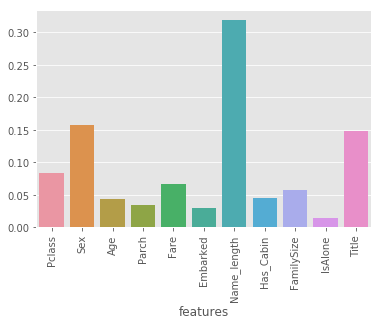

In [92]:
sns.barplot(importances.features, mean_value)
plt.xticks(rotation=90)

In [102]:
ada_oof_train

array([[ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [103]:
ada_oof_train.ravel()

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0

In [104]:
base_prediction_train=pd.DataFrame({'Adaboost':ada_oof_train.ravel(),
                                    'ExtraTree': ex_oof_train.ravel(),
                                    'RandomForest':rf_oof_train.ravel(),
                                    'GradientBoosting':gb_oof_train.ravel()
                                   })
base_prediction_train.head()

,Adaboost,ExtraTree,GradientBoosting,RandomForest
0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0


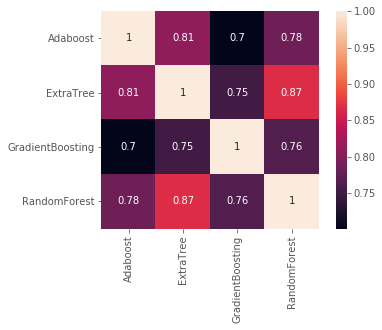

In [105]:
sns.heatmap(base_prediction_train.corr(),square=True, annot=True)

In [106]:
print(type(ada_oof_train))
ada_oof_train.shape

<class 'numpy.ndarray'>


(891, 1)

In [107]:
stack_x_train=np.concatenate((ada_oof_train,ex_oof_train,rf_oof_train,gb_oof_train,svc_oof_train),axis=1)
stack_x_test=np.concatenate((ada_oof_test, et_oof_test, rf_oof_test,gb_oof_test,svc_oof_test),axis=1)

In [108]:
stack_x_train

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [111]:
np.hstack([ada_oof_train,ex_oof_train,rf_oof_train,gb_oof_train,svc_oof_train])

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.],
       ..., 
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [112]:
stack_x_test

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0.8,  1. ,  1. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  0.2,  0. ,  0.2,  0.6]])

In [113]:
print(stack_x_train.shape)
print(stack_x_test.shape)

(891, 5)
(418, 5)


In [114]:
import xgboost as xgb


gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 200,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(stack_x_train, y_train)

predictions = gbm.predict(stack_x_test)



ModuleNotFoundError: No module named 'xgboost'